<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/13_(Fri)_January_02_34am_SVR_with_linear_cv_10_best_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename_a='/content/drive/MyDrive/machine_learning/B_NIR_DATA_csv.csv'
import pandas as pd
data_a = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")

In [4]:
xx,yy=data_a.shape
xx

624

In [5]:
data_a2=data_a.iloc[0::,1:yy+1]
data_a2.head()

,¸ðµ¨ Æ÷ÇÔ,Y_B,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,True,2.0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,0.279137,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,True,1.8,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,0.202679,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,True,6.7,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,0.309447,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,True,6.2,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,0.288594,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
4,False,5.1,0.253218,0.256407,0.260161,0.261418,0.261547,0.261116,0.259408,0.256675,...,3.004459,3.005398,3.000151,2.995331,2.997660,2.999729,2.992129,2.987290,2.988690,2.987576


In [6]:
import multiprocessing
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [7]:
ai=[]
for i in range(xx):
    if data_a2.iloc[i,0]==False:
        ai.append(i)
data_a3=data_a2.drop(ai,axis=0) #
data_a3
len(ai)
data_a3

,¸ðµ¨ Æ÷ÇÔ,Y_B,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,True,2.0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,0.279137,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,True,1.8,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,0.202679,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,True,6.7,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,0.309447,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,True,6.2,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,0.288594,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
12,True,2.2,0.137633,0.141045,0.144793,0.145757,0.145570,0.145180,0.143793,0.141257,...,2.912618,2.911201,2.898590,2.887394,2.886869,2.887019,2.875892,2.863482,2.862177,2.858754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,True,8.6,0.231522,0.230534,0.231280,0.231104,0.230198,0.229698,0.229015,0.227028,...,2.925508,2.927053,2.920447,2.915572,2.920224,2.922330,2.909775,2.897480,2.897737,2.897391
620,True,10.8,0.227531,0.226628,0.227406,0.227385,0.226585,0.225993,0.225327,0.223806,...,2.945441,2.943505,2.933849,2.929372,2.934153,2.933573,2.921115,2.910637,2.914499,2.916288
621,True,12.2,0.224536,0.223379,0.224203,0.224431,0.223999,0.223736,0.222991,0.220813,...,2.966221,2.969063,2.961253,2.952713,2.949854,2.944465,2.929207,2.920399,2.922437,2.923226
622,True,13.4,0.226519,0.225667,0.226440,0.226193,0.225218,0.224726,0.224143,0.222250,...,2.936783,2.939133,2.927408,2.915374,2.913538,2.912847,2.901005,2.891991,2.894289,2.893951


In [8]:
x1,y1=data_a3.shape
data_a1=data_a3.iloc[0::,2:yy+1]
data_a1

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.276093,0.279368,0.282974,0.283645,0.283141,0.282718,0.281553,0.279137,0.279341,0.282978,...,2.949425,2.949937,2.940435,2.930193,2.927044,2.926591,2.917971,2.911627,2.911584,2.909855
1,0.199544,0.202455,0.206198,0.207755,0.208028,0.207398,0.205435,0.202679,0.203198,0.207066,...,2.981332,2.984826,2.975499,2.964666,2.964128,2.967567,2.960830,2.954538,2.956946,2.955335
2,0.306803,0.309845,0.313508,0.314680,0.314671,0.314172,0.312433,0.309447,0.309265,0.312464,...,2.991938,2.992541,2.984488,2.976776,2.975918,2.973828,2.963011,2.955492,2.954702,2.949301
3,0.286879,0.290392,0.294110,0.294774,0.294035,0.293060,0.291292,0.288594,0.288835,0.292392,...,2.991402,2.990624,2.980183,2.970664,2.967151,2.961850,2.948892,2.939125,2.938542,2.934796
12,0.137633,0.141045,0.144793,0.145757,0.145570,0.145180,0.143793,0.141257,0.141577,0.145204,...,2.912618,2.911201,2.898590,2.887394,2.886869,2.887019,2.875892,2.863482,2.862177,2.858754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.231522,0.230534,0.231280,0.231104,0.230198,0.229698,0.229015,0.227028,0.224940,0.224793,...,2.925508,2.927053,2.920447,2.915572,2.920224,2.922330,2.909775,2.897480,2.897737,2.897391
620,0.227531,0.226628,0.227406,0.227385,0.226585,0.225993,0.225327,0.223806,0.222423,0.222653,...,2.945441,2.943505,2.933849,2.929372,2.934153,2.933573,2.921115,2.910637,2.914499,2.916288
621,0.224536,0.223379,0.224203,0.224431,0.223999,0.223736,0.222991,0.220813,0.218589,0.218392,...,2.966221,2.969063,2.961253,2.952713,2.949854,2.944465,2.929207,2.920399,2.922437,2.923226
622,0.226519,0.225667,0.226440,0.226193,0.225218,0.224726,0.224143,0.222250,0.220084,0.219543,...,2.936783,2.939133,2.927408,2.915374,2.913538,2.912847,2.901005,2.891991,2.894289,2.893951


In [9]:
data_a1_n=data_a1.to_numpy()
data_a1_input=data_a1_n
data_a1_input

array([[0.27609259, 0.27936762, 0.28297358, ..., 2.91162677, 2.91158401,
        2.90985458],
       [0.19954403, 0.20245471, 0.20619798, ..., 2.95453844, 2.95694632,
        2.95533475],
       [0.3068027 , 0.3098446 , 0.31350789, ..., 2.95549201, 2.9547023 ,
        2.94930113],
       ...,
       [0.22453563, 0.22337879, 0.22420344, ..., 2.92039857, 2.92243662,
        2.92322634],
       [0.22651915, 0.22566712, 0.22644003, ..., 2.89199138, 2.89428919,
        2.8939513 ],
       [0.23387301, 0.23272414, 0.23343534, ..., 2.89941353, 2.89407375,
        2.89014733]])

In [10]:
data_a1_output=data_a3.iloc[0::,1:2]
data_a1_output.head()

,Y_B
0,2.0
1,1.8
2,6.7
3,6.2
12,2.2


In [11]:
data_a1_output_n=data_a1_output.to_numpy().flatten()
data_a1_target=data_a1_output_n
data_a1_target

array([ 2.   ,  1.8  ,  6.7  ,  6.2  ,  2.2  ,  2.4  ,  4.   ,  7.8  ,
        9.4  ,  8.2  ,  3.7  ,  3.6  ,  5.7  ,  7.8  ,  6.4  , 11.9  ,
        3.7  ,  6.   ,  7.9  ,  6.5  , 12.2  ,  3.8  ,  3.1  ,  3.7  ,
        8.2  ,  9.8  ,  3.9  ,  3.7  ,  6.1  ,  8.5  ,  9.7  , 12.6  ,
        3.5  ,  3.7  ,  5.5  ,  7.7  ,  9.4  , 10.9  ,  0.6  ,  2.   ,
        3.3  ,  5.4  ,  9.7  ,  2.2  ,  2.4  ,  4.   ,  7.8  ,  9.4  ,
        8.2  ,  3.7  ,  3.6  ,  5.7  ,  7.8  ,  6.4  ,  3.7  ,  1.8  ,
        6.   ,  7.9  ,  6.5  , 12.2  ,  3.8  ,  3.1  ,  3.7  ,  8.2  ,
        9.8  ,  3.9  ,  3.7  ,  6.1  ,  8.5  ,  9.7  , 12.6  ,  3.5  ,
        3.7  ,  5.5  ,  7.7  ,  9.4  , 10.9  ,  0.6  ,  2.   ,  3.3  ,
        5.4  ,  9.7  ,  3.256,  3.185,  5.303,  7.076,  7.907, 10.775,
        2.921,  3.19 ,  5.359,  7.221,  8.563, 10.755,  3.102,  2.792,
        5.231,  7.233,  8.376, 10.826,  3.154,  2.9  ,  5.334,  7.223,
        8.483, 10.932,  3.128,  3.234,  5.305,  7.323,  8.33 , 10.531,
      

In [12]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [13]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE


#SVM을 사용한 분류모델 
# 커널기법

In [14]:
#X,y = load_boston(return_X_y=True)
X=data_a1_input
y=data_a1_target
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

힉습 데이터 점수:0.006362068818078992
평가 데이터 점수:0.0019910856900428042


In [ ]:
#no
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#커널기법

In [ ]:
#no
X,y=load_boston(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

linear_svr=SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 힉습 데이터 점수:{}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수:{}".format(linear_svr.score(X_test, y_test)))

poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train,y_train)

print("Polynomial SVR 힉습 데이터 점수:{}".format(poly_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수:{}".format(poly_svr.score(X_test, y_test)))

rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svr.score(X_test, y_test)))

In [ ]:
#no

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

print("Linear SVC 힉습 데이터 점수:{}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수:{}".format(linear_svc.score(X_test, y_test)))

poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train,y_train)

print("Polynomial SVC 힉습 데이터 점수:{}".format(poly_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수:{}".format(poly_svc.score(X_test, y_test)))

rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svc.score(X_test, y_test)))

#매개변수 튜닝

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

poly_svc=SVC(kernel='poly',degree=2,C=0.1,gamma='auto')
poly_svc.fit(X_train,y_train)

print("kernel=poly, degree={},C={},gamma={}".format(2,0.1,'auto'))

print("Polynomial SVC 힉습 데이터 점수:{}".format(poly_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수:{}".format(poly_svc.score(X_test, y_test)))


In [ ]:
rbf_svc=SVC(kernel='rbf',C=2.0, gamma='scale')
rbf_svc.fit(X_train,y_train)
print("kernel=rbf,C={},gamma={}".format(2,0,'scale'))
print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svc.score(X_test, y_test)))

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC()
model.fit(X_train,y_train)

In [ ]:
print("SVC 힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
#no end 

#Linear SVR

In [19]:
#X,y=load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [20]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [22]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.955186888416511
평가 데이터 점수:0.8663251604980244


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


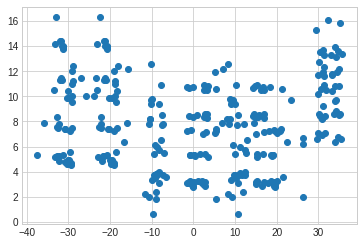

In [23]:
X_comp=TSNE(n_components=1).fit_transform(X)
import matplotlib.pyplot as plt
plt.scatter(X_comp,y);

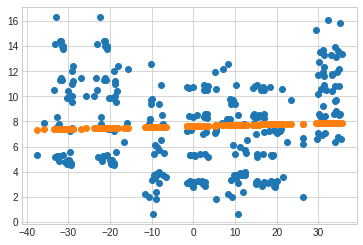

In [24]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [25]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    7.0s finished


{'fit_time': array([2.53474903, 2.48722577, 2.05989742, 3.03434634, 1.32254148]),
 'score_time': array([0.01198387, 0.01321077, 0.01218772, 0.01217723, 0.00957799]),
 'test_score': array([  0.46218678,   0.879314  ,   0.91794313,   0.91369283,
        -14.3034247 ])}

In [26]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [27]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=1.0, kernel='linear'))])

In [28]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=1.0, kernel='linear'))])

In [29]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.6499309457823914
평가 데이터 점수:0.5594716297866429


In [40]:
estimator=make_pipeline(StandardScaler(), SVR(C=1.2, epsilon=0.01,kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   22.8s finished


{'fit_time': array([6.05391097, 4.31976557, 3.64655161, 3.23633838, 3.95945382,
        3.45726514, 3.41730714, 3.75113082, 4.11068869, 3.4340415 ]),
 'score_time': array([0.0082581 , 0.00855589, 0.00778317, 0.00783706, 0.00773883,
        0.00765133, 0.00766206, 0.0077405 , 0.00760508, 0.00642276]),
 'test_score': array([0.62065291, 0.64350582, 0.87230527, 0.94080285, 0.88556812,
        0.95254027, 0.91388941, 0.92245065, 0.89916229, 0.78965139])}

In [45]:
estimator=make_pipeline(StandardScaler(), SVR(C=0.01, epsilon=1.0,kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.7s finished


{'fit_time': array([0.13491535, 0.10610795, 0.07392716, 0.15999246, 0.10094166,
        0.08853865, 0.18507218, 0.10720134, 0.09286761, 0.07681727]),
 'score_time': array([0.03365183, 0.02460623, 0.01575565, 0.03908181, 0.01527333,
        0.01973343, 0.04134512, 0.01360822, 0.01707244, 0.01650739]),
 'test_score': array([-0.18133953, -0.45444257, -0.17580758, -0.20095998, -0.15036454,
         0.01036588, -0.18810945, -0.24329923, -0.72465364, -2.27118693])}

In [42]:
estimator=make_pipeline(StandardScaler(), SVR(C=1.2, epsilon=0.01,kernel='poly'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.7s finished


{'fit_time': array([0.10985398, 0.13406324, 0.14002252, 0.11733127, 0.11945796,
        0.12803817, 0.11897445, 0.1135776 , 0.12825942, 0.12147093]),
 'score_time': array([0.0127368 , 0.0094924 , 0.01303601, 0.01628494, 0.0107069 ,
        0.00947237, 0.01033068, 0.01051044, 0.01294446, 0.01202512]),
 'test_score': array([-2.30460324e+01, -4.43694158e-01, -3.11375331e-02, -1.03031592e-01,
        -6.32402685e-02, -6.89644323e-03, -2.57864615e-01, -1.02497057e-01,
        -9.62265916e-02, -6.35919533e-01])}

In [43]:
estimator=make_pipeline(StandardScaler(), SVR(C=1.2, epsilon=0.01,kernel='sigmoid'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished


{'fit_time': array([0.16854835, 0.16245508, 0.13541198, 0.16159177, 0.16835546,
        0.10246277, 0.11334538, 0.20254564, 0.15186834, 0.11462688]),
 'score_time': array([0.02088451, 0.02296901, 0.02130079, 0.00965881, 0.00942564,
        0.01131725, 0.02521348, 0.00883031, 0.01845026, 0.00872493]),
 'test_score': array([-36.96455965,  -3.67685976,  -0.50208791, -13.66433619,
         -2.34727218,  -3.27586923,  -9.2735055 ,  -5.88806881,
         -4.93580411,  -6.21288126])}

In [44]:
estimator=make_pipeline(StandardScaler(), SVR(C=1.2, epsilon=0.01,kernel='precomputed'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyth

{'fit_time': array([0.01584792, 0.01481819, 0.01581931, 0.01645279, 0.01918578,
        0.01725698, 0.0179143 , 0.01719642, 0.01762009, 0.0174036 ]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [ ]:
# no start------------------------------

#당뇨병

In [ ]:
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [ ]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

#당뇨병


In [ ]:
#no end ------------------------

In [ ]:
#X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.2936224439043682
평가 데이터 점수:0.2814792090711109


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


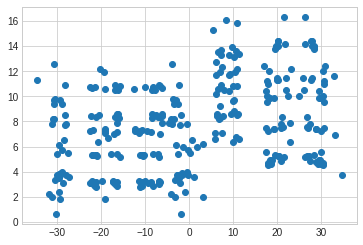

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

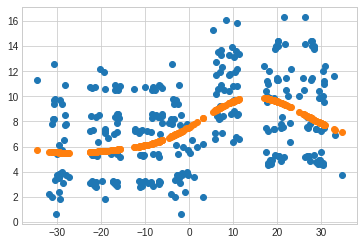

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [ ]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished


{'fit_time': array([0.10615492, 0.11666393, 0.09994841, 0.11162877, 0.06199884]),
 'score_time': array([0.04698372, 0.03903961, 0.05120921, 0.04128766, 0.02304482]),
 'test_score': array([-1.76611275e-01,  1.48032427e-03,  1.58547551e-01, -8.87295652e-04,
        -1.19291320e+00])}

#RBF, POlynomial, Sigmoid RBF--Best

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__kernel':['rbf','polynomial', 'sigmoid']}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.2936224439043682
평가 데이터 점수:0.2814792090711108


#RBF

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(gamma='auto'))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(gamma='auto'))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.2936224439043682
평가 데이터 점수:0.2814792090711107


#sigmoid

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='sigmoid'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.006912430734044572
평가 데이터 점수:-0.007994401771863169


#Polynomial

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='sigmoid'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.006912430734044572
평가 데이터 점수:-0.007994401771863169


In [ ]:
#no start---------------------------------------

# 이후는 분류기 문제임 
#linear SVC
#유방암 

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#와인

In [ ]:
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__kernel':['rbf','polynomial', 'sigmoid']}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

#유방암

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#와인

In [ ]:
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#end

In [ ]:
#no end-----------------------------------